# **Proyecto Aplicado Modulo 2: Introducción a Machine Learning con *Python***
---
**Autor**: Luis Felipe De La Ossa Mayorga

En este notebook se presentan diferentes métodos de Machine Learning para el procesamiento de los datos ficticios de una organización basa sus procesos comerciales a partir de una venta consultiva (oportunidades). Estos datos fueron proporcionados por la compañía Keyrus [1].

## Importación de Librerías
------
Para este proyecto se trabajará principalmente con la libreria especializada de Machine Learning Scikit-Learn.
Para las funciones de visualización se ultilizaron las librerias seaborn y Matplotly de python.



In [1]:
import numpy as np  
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Funciones de Visualización 
------
Las siguientes funciones fueron tomadas prestadas de los diferentes talleres guiados proporcionados a lo largo del desarrollo del módulo [2].

In [2]:
# Función para visualizar la curva de aprendizaje a partir 
# del error de entrenamiento y de generalización para KNN.
def plot_learning_curve(train_error, generalization_error):
  
  balance_point = np.array(generalization_error).argmin() + 1
  plt.figure(figsize = (8, 5), dpi = 105)

  plt.plot(range(1, k_val + 1), train_error, label="Entrenamiento")
  plt.plot(range(1, k_val + 1), generalization_error, label="Generalización")
  plt.xticks(range(0, k_val + 1, 5))
  plt.xlabel("k-vecinos")
  plt.ylabel("Error")
  y_min, y_max = plt.gca().get_ylim() 
  plt.vlines(balance_point, y_min, y_max, colors = ['red'], linestyles = ['dashdot'])
  plt.ylim([y_min, y_max])
  plt.text(balance_point + 1, 0.165, 'Punto de balance')
  plt.legend();

In [3]:
# Función para visualizar la curva de aprendizaje a partir 
# del error de entrenamiento y de generalización para Desicion Tree.
def plot_learning_curve2(train_error, generalization_error):
  n = len(train_error)
  if len(train_error) != len(generalization_error):
    print("Las secuencias de error de entrenamiento y generalización deben tener el mismo tamaño.")
    return

  balance_point = np.array(generalization_error).argmin() + 1
  plt.figure(figsize = (8, 5), dpi = 105)

  plt.plot(range(1, n + 1), train_error, label="Entrenamiento")
  plt.plot(range(1, n + 1), generalization_error, label="Generalización")
  plt.xticks(range(0, n + 1, 2))
  plt.xlabel("Profundidad máxima")
  plt.ylabel("Error")
  y_min, y_max = plt.gca().get_ylim() 
  plt.vlines(balance_point, y_min, y_max, colors = ['red'], linestyles = ['dashdot'])
  plt.ylim([y_min, y_max])
  plt.text(balance_point + 1, 0.165, 'Punto de balance')
  plt.legend();

In [4]:
# Función para visualizar un conjunto de datos de dos variables en un plano 2D.
def plot_data(X, y, model = None, ax = None, title=None):

    if ax is None:
      _, ax = plt.subplots(dpi = 110)

    if model is not None: 
      pred_fun = gen_pred_fun(model)
      plot_decision_region(X, pred_fun, ax)

    y_unique = np.unique(y)    
    df = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'Clases': y})
    sns.set_theme()
    sns.scatterplot(data = df, x = 'x1', y = 'x2', 
                    hue = 'Clases',style = 'Clases', ax = ax, palette = 'Set1').set_title(title)

In [5]:
#Función para generar la función de predicción de un clasificador entrenado previamente.
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

In [39]:
# Función para visualizar la superficie de decisión de un clasificador.
def plot_decision_region(X, pred_fun, ax=None):
    min_x, max_x = np.min(X[:, 0]), np.max(X[:, 0])
    min_y, max_y = np.min(X[:, 1]), np.max(X[:, 1])
 
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05

    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)

    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape

    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
      for j in range(grid_c):
        ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])    
    
    cs = ax.contourf(XX, YY, ZZ, 100, cmap = plt.cm.Pastel1, vmin = 0, vmax = np.max(ZZ)* 9. / (np.max(ZZ) + 1), alpha = 0.75)        
    ax.get_figure().colorbar(cs, ax=ax, )
    ax.set_xlabel("x")
    ax.set_ylabel("y")

In [7]:
def cumulative_explained_variance_plot(expl_variance):

  cum_var_exp = np.cumsum(expl_variance)

  plt.figure(dpi = 100, figsize = (8, 6))
  plt.title('Curva acumulativa de la varianza explicada VS n° de componentes principales', 
            fontdict= dict(family ='serif', size = 16))
  plt.xlabel('Número de componentes principales',
             fontdict= dict(family ='serif', size = 14))
  plt.ylabel('Varianza explicada acumulativa',
             fontdict= dict(family ='serif', size = 14))  

  nc = np.arange(1, expl_variance.shape[0] + 1)

  plt.plot(nc, cum_var_exp, '--r')
  plt.plot(nc, cum_var_exp, 'c*', ms = 5)   
  plt.show()

## **Descripción del dataset**

-------

El dataset trabajado en este proyecto llamado **"Oprtunidad"** es un conjunto de datos de una compañía en el cual se muestran las oportunidades ganadas y perdidas a lo largo de un año. 

El dataset cuenta con un total de 31823 registros de ventas y con 17 columnas, de las cuales 15 corresponden a los detalles de la venta, tales como: el país de donde se provenía la oportunidad de venta, el tipo de suministros que se vendería, el valor de la oportunidad en dólares (USD), etc.

Las otras dos columnas corresponden al ID de la oportunidad de venta y a su resultado (si se ganó, es decir, si se cerró la venta o si se perdió)


## **Problema** 
------

El problema a resolver está enfocado en dos subproblemas principales. Estos el modelamiento predictivo y el modelamiento clasificatorio de los datos por medio de métodos supervisados. Adicionalmente, se realizará el correspondiente análisis cuantitativo y cualitativo de los resultados de estos métodos por medio de distintas métricas.

## **Objetivos** 
------
**Objetivo General**:

Realizar modelamientos predictivos y clasificatorios de los datos para aplicarlos a futuras oportunidades de ventas.

**Objetivos Específicos**:

*   Aplicar distintos métodos de entrenamiento supervisado al dataset principal mencionado anteriormente, con el fin de obtener modelos predictivos.

*   Utilizar estos métodos en el dataset para clasificar las oportunidades de venta en grupos basados en sus características. 

*   Hacer uso de las métricas correspondientes a cada modelo, y basándose en estas, realizar el análisis correspondiente de los resultados obtenidos.

## **1. Carga De Datos**
------

In [8]:
%%capture
#Descarga de datos desde Drive
!gdown https://drive.google.com/uc?id=1PB4aHc1r-I-YsUlUVVDDD7hqUqB0U4LC #Data oportunidades
!gdown https://drive.google.com/uc?id=1qJ18GTlVzZ7ZcbPc1I6IQOPztjRGcNvx ##data paises

In [9]:
#Carga de los datos historicos y los datos a añadir
oportunidad=pd.read_csv('oportunidad.csv')
paises=pd.read_excel('Countries.xlsx')

#Se transforma el data frame de los paises a un diccionario
count_dict=dict(zip(paises.ID,paises.Country))

#Se mapea el diccionario en el data frame original para crear una nueva columna con los nombres de los paises
oportunidad['Country']=oportunidad['Country_Code'].map(count_dict)

## **2. Descripción de los Datos** 
------

In [10]:
oportunidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31823 entries, 0 to 31822
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Opportunity Number                       31515 non-null  float64
 1   Supplies Subgroup                        31823 non-null  object 
 2   Supplies Group                           31823 non-null  object 
 3   Opportunity Result                       31823 non-null  object 
 4   Sales Stage Change Count                 31823 non-null  int64  
 5   Total Days Identified Through Closing    31823 non-null  int64  
 6   Total Days Identified Through Qualified  31823 non-null  int64  
 7   Opportunity Amount USD                   31823 non-null  int64  
 8   Client Size By Revenue                   31823 non-null  int64  
 9   Client Size By Employee Count            31823 non-null  int64  
 10  Revenue From Client Past Two Years       31823

In [11]:
oportunidad.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Deal Size Category,Lat,Lon,Country_Code,Country
0,NaN,Car Electronics,Car Electronics,Won,5,94,90,469000,1,1,0,None,6,-16.130262,-63.808594,1,Bolivia
1,NaN,Garage & Car Care,Car Accessories,Won,4,4,4,5000,3,2,0,Unknown,1,-16.130262,-63.808594,1,Bolivia
2,NaN,Shelters & RV,Performance & Non-auto,Loss,4,71,71,200000,3,1,0,Unknown,5,-16.130262,-63.808594,1,Bolivia
3,NaN,Motorcycle Parts,Performance & Non-auto,Loss,2,46,46,120000,5,1,0,Unknown,5,-16.130262,-63.808594,1,Bolivia
4,NaN,Replacement Parts,Car Accessories,Won,3,6,6,12000,1,1,0,Unknown,2,-16.130262,-63.808594,1,Bolivia


##**3. Preprocesamiento de los datos**
----------

### **Limpieza de datos**
---

Como se puede evidenciar en la sección de descripción de los datos, todas las columnas se encuentran completas, es decir, todas poseen la misma cantidad de datos y no poseen valores faltantes. 
Ahora, en la siguiente celda se eliminará la primera columna que corresponde al ID de la oportunidad porque estas cantidades son solo identificadores, por lo cual no aportan ni a los modelos predictivos ni a los clasificatorios.

In [12]:
oportunidad=oportunidad.drop('Opportunity Number',axis=1)

Adicionalmente, para la parte del resultado de la oportunidad (columna llamada 'Opportunity Result') se creará una función que transforme las variables Win y Loss en variables dummies, es decir, Win corresponderá al valor **1** y Loss al valor **0**. Esto con el objetivo de facilitar los modelamientos más adelante.

In [13]:
#Transformar los valores de la columna 'Opportunity Result' de won and loss to 1 and 0 respectively

def ones_column(data,col):
  df_ones=pd.get_dummies(data[col])
  df_two = pd.concat((df_ones, data), axis=1)
  df_two = df_two.drop([col], axis=1)
  return df_two

In [14]:
#Se ubican los 1 y 0 de manera apropiada en el dataset
oportunidad= ones_column(oportunidad,'Opportunity Result')
oportunidad = oportunidad.drop(["Loss"], axis=1)
oportunidad = oportunidad.rename(columns={"Won": "Opportunity Result"})

### Asignación de variables **X** y **y** para posterior modelado
---------

Se asignan las variables **X** (Las caracteristicas de las oportunidades) y **y** (caracteristica objetivo a predecir, en este caso el resultado de la oportunidad).

In [15]:
X = oportunidad.drop(['Opportunity Result'], axis=1)
y = oportunidad['Opportunity Result']

### Transformación de Variables Categóricas en Variables Numéricas
------------

En esta parte se transformarán todas las variables categóricas del dataset en variables numéricas por medio del método One Hot Encoding.

In [16]:
#Division de variables categoricas y numericas de X

numeric=['Sales Stage Change Count', 'Total Days Identified Through Closing', 'Total Days Identified Through Qualified',
         'Opportunity Amount USD', 'Client Size By Revenue','Client Size By Employee Count', 'Revenue From Client Past Two Years',
         'Deal Size Category', 'Lat','Lon']
Categoric=['Supplies Subgroup', 'Supplies Group','Competitor Type','Country']

#Transformar en arreglos de numpy para el modelo de scikit learn
X_num= X[numeric].values
X_cat = X[Categoric].values

In [17]:
# One hot encoding para transformar las variables categoricas en 1 y 0.  sparse=False para mantener arreglos de Numpy
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)     # Se declara el Transformer "OneHotEncoder".
X_categoric_onehot = enc.fit_transform(X_cat) # Se usa "fit_transform" para obtener la matriz transformada.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Reescalamiento de las variables numéricas

----------

Se reescalan las variables numéricas por medio del metodo Min Max Scaler.

In [18]:
#Preprocesamiento de los datos númericos transformandolos (reescalandolos) por medio del metódo min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))  # Se declara el Transformer "MinMaxScaler" entre 0 y 1
X_num_minmax = scaler.fit_transform(X_num) # Se transforman las variables númericas 

### Unión y división de los datos
---------

A continuación se unen los datos numéricos reescalados y los datos categóricos transformados y luego se dividen en datos de entrenamiento y datos de prueba en una proporción 70/30 respectivamente. Esto debido a que no se tiene una gran cantidad de datos (alrededor de 40000 entradas) .

In [19]:
#Unimos todos los datos transformados de nuevo como arreglo final de las variables X
X_prepr = np.concatenate((X_num_minmax, X_categoric_onehot),axis=1)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prepr, y, test_size=0.3,stratify=y, random_state=42)

## **4. Métodos Supervisados**

----------------

En esta sección se modelarán los datos de forma predictiva con diferentes métodos supervisados y se encontrarán los mejores hiperparámetros posibles con base en las métricas correspondientes.

### KNN (K-Nearest Neighbors)

Se empieza por el metodo más sencillo, en este caso es KNN, de esta manera se modelan los datos de la siguiente forma:

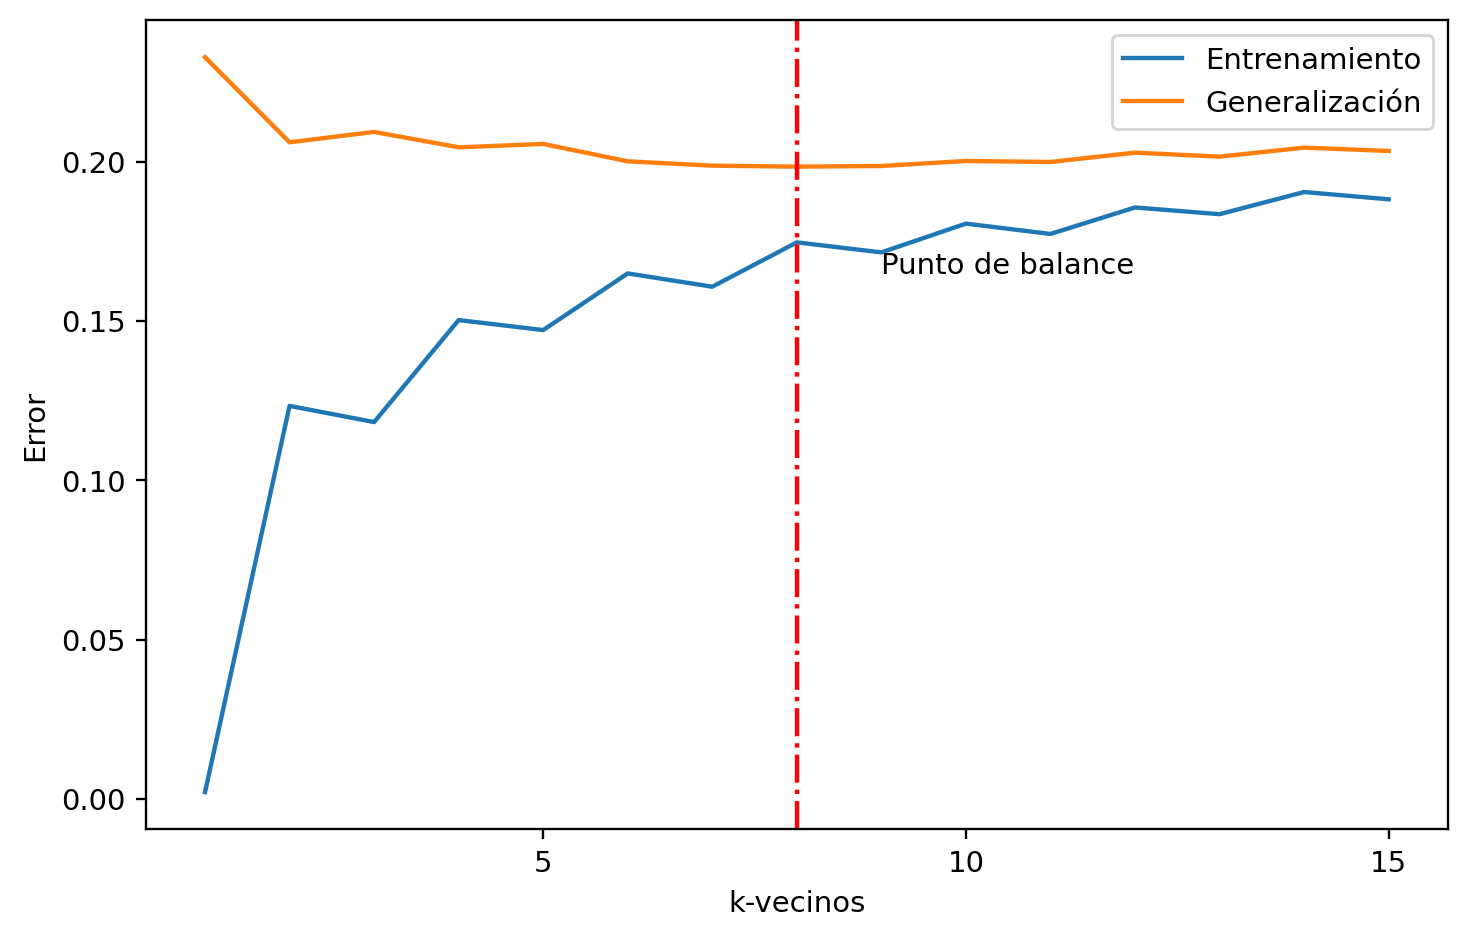

In [21]:
#Entrenamiento usando KNN para diferentes valores de k (cuantos vecinos tomaremos en cuenta)

k_val=15
train_error = []
generalization_error = []
from sklearn.neighbors import KNeighborsClassifier

for nn in range(1, k_val + 1):
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_train, y_train)
    train_error.append(1 - knn.score(X_train, y_train))
    generalization_error.append(1 - knn.score(X_test, y_test))


plot_learning_curve(train_error, generalization_error)

Como se puede observar en la gráfica, para valores pequeños de K, se tendrá un sobre ajuste en los datos de entrenamiento y para valores grandes se empezará a presentar sub ajuste. De esta manera el mejor valor de K es **K=8**. 
A continuación se encuentra el error de generalización del modelo y sus métricas correspondientes. 

In [22]:
print("Error de generalización con k = 8:", generalization_error[7])

Error de generalización con k = 8: 0.1983869278307322


**Es decir, el error del mejor clasificador de KNN es de apróximadamente 19%.**

El reporte de las métricas se da a continuación.

In [23]:
from sklearn.metrics import classification_report


##Modelos entrenado para K=8
knn8 = KNeighborsClassifier(n_neighbors=8)
knn8.fit(X_train, y_train)

#valores predichos con el clasificador anterior

y_pred_knn= knn8.predict(X_test)

#Reporte general de las metricas


print(classification_report(y_test,    
                            y_pred_knn,                                
                            target_names=['Oportunidades Perdidas', 'Oportunidades Ganadas'],  
                            digits=4)) 

                        precision    recall  f1-score   support

Oportunidades Perdidas     0.8151    0.9611    0.8821      7373
 Oportunidades Ganadas     0.6639    0.2608    0.3745      2174

              accuracy                         0.8016      9547
             macro avg     0.7395    0.6109    0.6283      9547
          weighted avg     0.7807    0.8016    0.7665      9547



Observando las métricas para el modelo, se puede afirmar que es muy bueno al momento de predecir e identificar las oportunidades perdidas, esto con base en los valores de la precisión y el recall que poseen valores relativamente altos. Adicionalmente, el F1-score confirma este análisis con un valor combinado para las dos métricas anteriores del 88% al momento de analizar las oportunidades Pérdidas.

Respecto a las oportunidades ganadas, el modelo falla bastante en su predicción, con una precisión del 66% y un recall para su correcta clasificación del 26% (Muy bajo).

### Decision Tree (Árbol de Decisión)

El siguiente método que se utilizará es el árbol de decisión.
En este caso se iniciará variando el hiperparámetro de la profundidad máxima del árbol y luego se hará una búsqueda más profunda de la mejor combinación de hiperparámetros por medio del Grid Search.

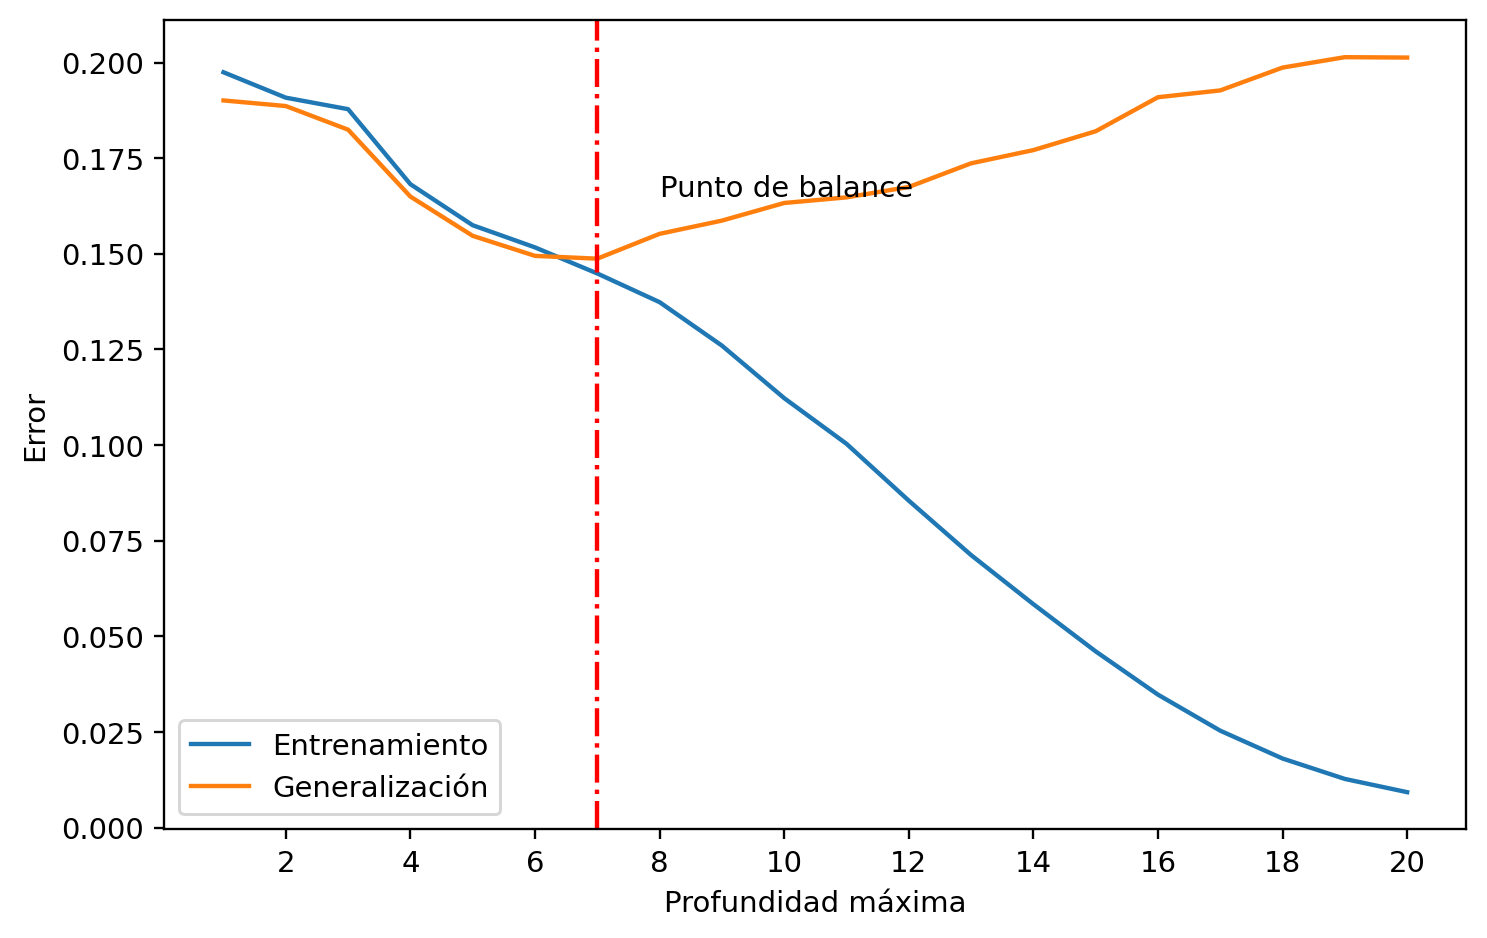

In [24]:
from sklearn.tree import DecisionTreeClassifier
# Números enteros de 1 a 20 como posibles valores de profundidad. Se eligió este hiperparametro ya que es uno de los
# más importantes en un arbol de desacición y muchas ocasiones el que más afecta el modelo al ser modificado.
max_depth_values = np.arange(1, 21, 1)

# Arreglos vacíos para almacenar el error de entrenamiento y el de generalización.
train_error_tree = np.empty(len(max_depth_values))
generalization_error_tree = np.empty(len(max_depth_values))


for depth in max_depth_values:
    # Entrenamos un árbol de decisión para cada valor de profundidad.
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    decision_tree.fit(X_train, y_train)
    # Almacenamos el error de entrenamiento y de generalización por cada árbol.
    train_error_tree[depth - 1] = (1 - decision_tree.score(X_train, y_train))
    generalization_error_tree[depth - 1] = (1 - decision_tree.score(X_test, y_test))

plot_learning_curve2(train_error_tree, generalization_error_tree)

En este caso, el mejor valor para la profundidad máxima es **max_depth=7**. El error de generalización correspondiente será:



In [25]:
print("Error de generalización con profundidad máxima = 7:", generalization_error_tree[7])

Error de generalización con profundidad máxima = 7: 0.1552320100555148


Ahora, se realizará la validación cruzada y se hallará la mejor combinación de hiperparametros.

In [27]:
%%capture
# Búsqueda en cuadrícula de hiperparámetros.
from sklearn.model_selection import GridSearchCV 

param_grid_tree = {'max_depth':     [i for i in np.arange(1, 15, 1)], 
              'min_samples_split': [i for i in range(1, 6, 1)],
              'min_samples_leaf': [i for i in range(1, 6, 1)]}

grid_clf_tree= GridSearchCV(DecisionTreeClassifier(), 
                   param_grid=param_grid_tree, 
                   verbose=1, 
                   return_train_score=True
                   )
grid_clf_tree.fit(X_train, y_train)

In [28]:
print(grid_clf_tree.best_params_)
print(grid_clf_tree.best_score_)
print("Error de generalización con mejor combinación de Hiperpárametros:", 1-grid_clf_tree.score(X_test, y_test))


{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 3}
0.8421171116712708
Error de generalización con mejor combinación de Hiperpárametros: 0.14789986383157017


**Por lo tanto, el error del mejor clasificador de Decision Tree es de apróximadamente 14.8%.**

In [29]:
##Modelos entrenado para los mejores parametros del arbol
best_tree = DecisionTreeClassifier(max_depth=7,min_samples_leaf=1,min_samples_split=4)
best_tree.fit(X_train, y_train)

#valores predichos con el clasificador anterior

y_pred_tree= best_tree.predict(X_test)

#Reporte general de las metricas


print(classification_report(y_test,    
                            y_pred_tree,                                
                            target_names=['Oportunidades Perdidas', 'Oportunidades Ganadas'],  
                            digits=4)) 

                        precision    recall  f1-score   support

Oportunidades Perdidas     0.8869    0.9261    0.9061      7373
 Oportunidades Ganadas     0.7051    0.5994    0.6479      2174

              accuracy                         0.8517      9547
             macro avg     0.7960    0.7627    0.7770      9547
          weighted avg     0.8455    0.8517    0.8473      9547



Las métricas de desempeño del modelo del árbol de decisión mejoran bastante respecto al caso del modelo KNN como se puede evidenciar en reporte anterior. 

Las oportunidades perdidas son altamente predichas y clasificadas de forma correcta con un valor combinado dado por el F1-score del 90% aproximadamente.

Además, el árbol de decisión también mejora bastante respecto al KNN al modelar las oportunidades ganadas, logrando un F1-score del 64%.


### Reducción de la dimensionalidad
----------

En esta parte se hará una reducción de la dimensionalidad de los datos en sus componentes principales **PCA** con el objetivo de facilitar el análisis del modelado por medio de visualizaciones.

Inicialmente exploraremos una curva de varianza acumulada para entender la importancia del número de componentes principales.

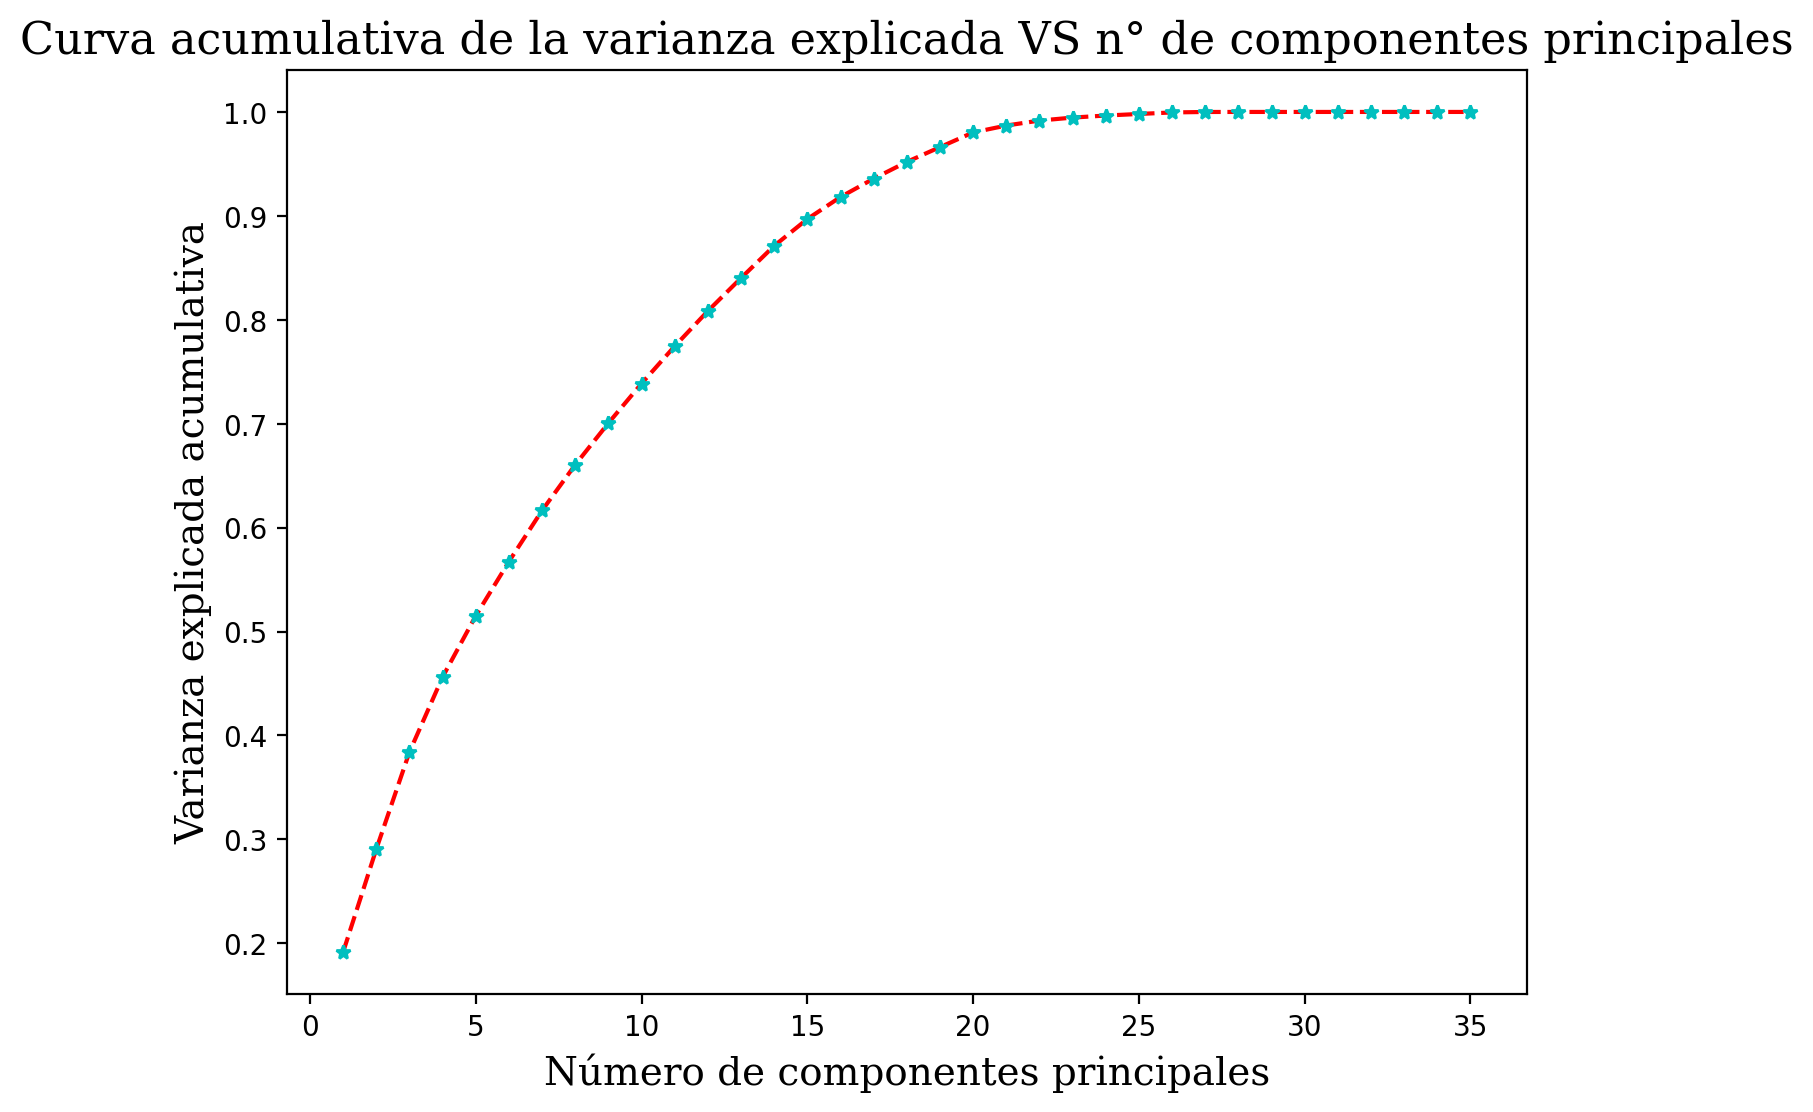

In [30]:
from sklearn.decomposition import PCA
## Función PCA para todas las componentes
pca= PCA() 
transf_pca = pca.fit_transform(X_train)
varianza_expl = pca.explained_variance_ratio_

cumulative_explained_variance_plot(varianza_expl)

Como se puede observar, las primeras 2 componentes principales tienen una correspondencia del alrededor del **30%** de la varianza total. Con base en este resultado, es válido usar solo dos componentes principales con el objetivo de visualizar algunos de los modelados que siguen.

In [31]:
## Transformación de los datos para 2 componentes principales.

pca2= PCA(n_components=2)
X_transf_pca2 = pca2.fit_transform(X_train)

### SVN con Kernel Gaussiano

----------

El siguiente modelado para los datos es una máquina de vectores de soporte con kernel Gaussiano. 

Se escogió este Kernel sobre el Kernel lineal debido a la compleja distribución de los datos. Esta distribución se muestra en la siguiente gráfica.

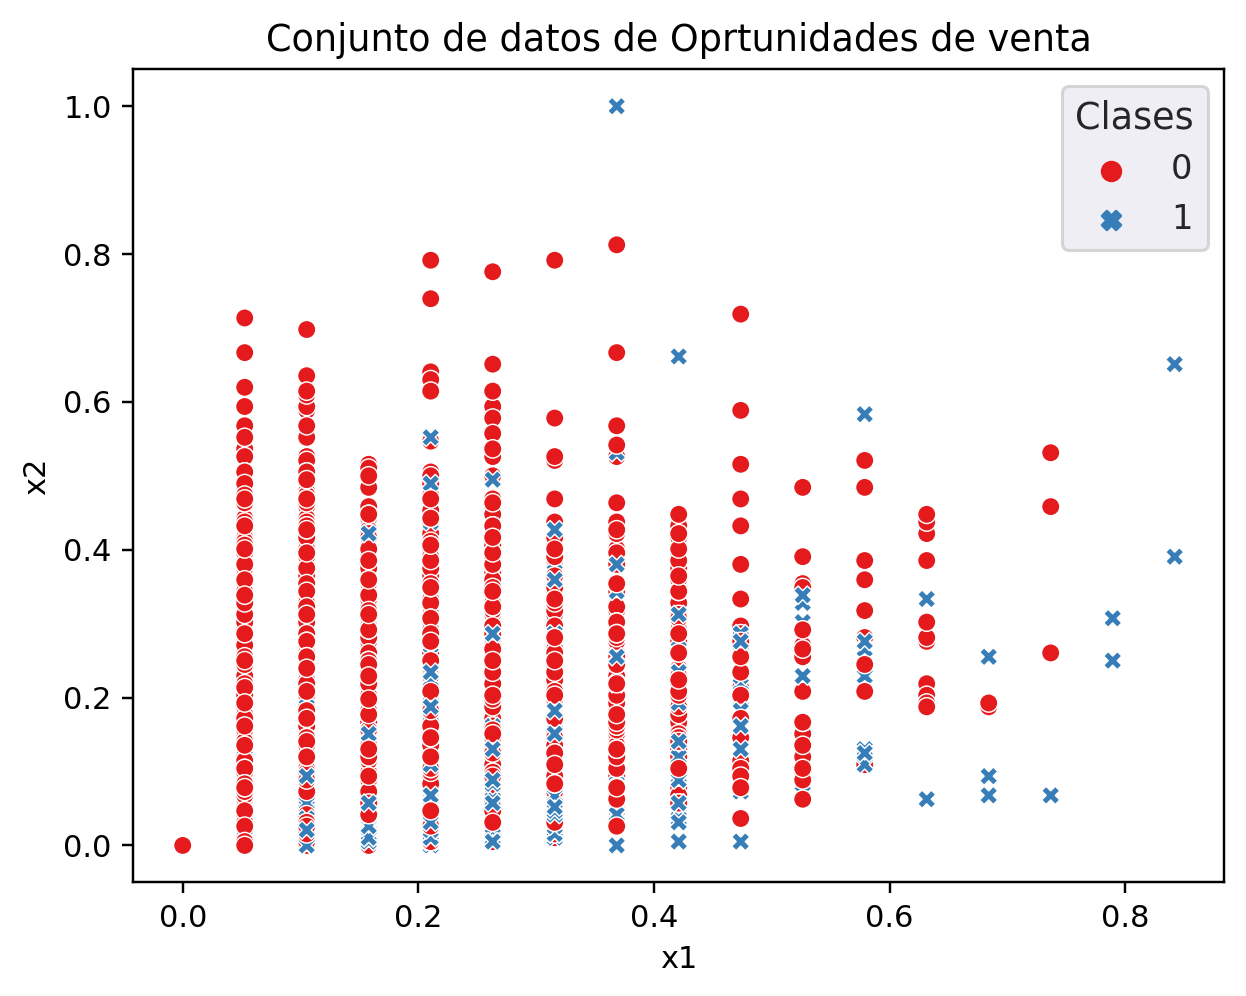

In [32]:
plot_data(X_train, y_train, title = 'Conjunto de datos de Oprtunidades de venta')

In [35]:
%%time
#Clasificador de vectores de soporte general.
from sklearn.svm import SVC        

param_grid_rbf = {'C':     [2**i for i in range(-3, 3, 1)], 
              'gamma': [2**i for i in range(-3, 3, 1)]}

grid_clf_rbf = GridSearchCV(SVC(kernel='rbf'), 
                   param_grid=param_grid_rbf, 
                   verbose=1, 
                   return_train_score=True
                   )

grid_clf_rbf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: user 1h 33min 58s, sys: 7.7 s, total: 1h 34min 6s
Wall time: 1h 34min 8s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.125, 0.25, 0.5, 1, 2, 4],
                         'gamma': [0.125, 0.25, 0.5, 1, 2, 4]},
             return_train_score=True, verbose=1)

In [36]:
print(grid_clf_rbf.best_params_)
print(grid_clf_rbf.best_score_)
print("Error de generalización con mejor combinación de Hiperpárametros:", 1-grid_clf_rbf.score(X_test, y_test))

{'C': 4, 'gamma': 0.25}
0.8178310030284897
Error de generalización con mejor combinación de Hiperpárametros: 0.17701895883523622


**De esta manera, el error del mejor clasificador de SVC con Kernel Gaussiano es de apróximadamente 17.7%.**

Para visualizar el modelo de entrenamiento SVN, se tomarán las dos componentes principales halladas anteriormente y con ellas se volverá a entrenar el modelo con los mejores parámetros hallados en el estudio del Grid Search.

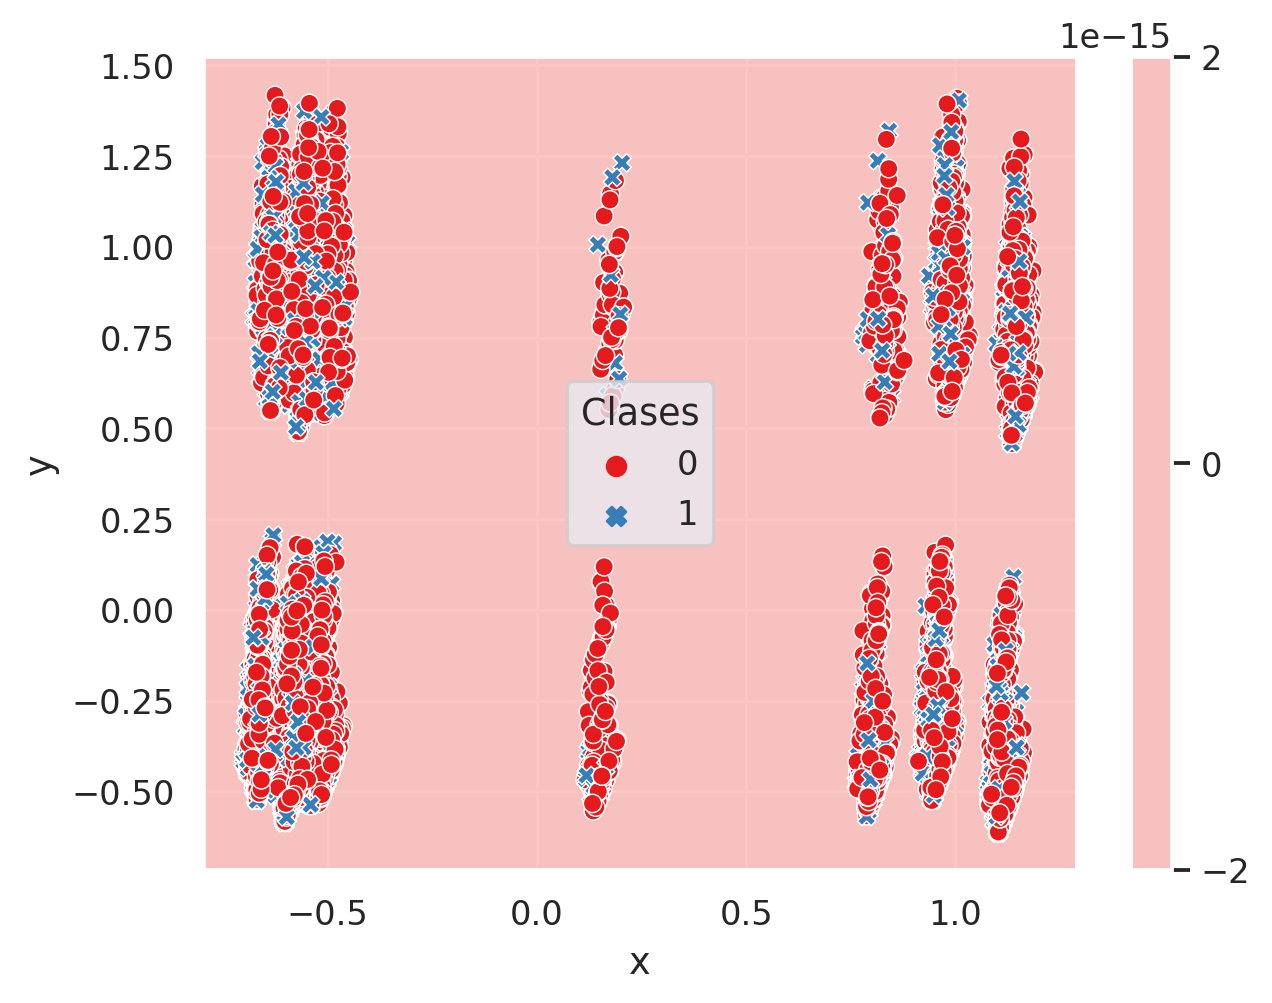

In [40]:
rbf_svm = SVC(kernel='rbf', gamma = 0.25, C=4)
rbf_svm2= rbf_svm.fit(X_transf_pca2, y_train)
plot_data(X_transf_pca2, y_train, rbf_svm2)

Ahora, se realiza un reporte de las métricas de desempeño para el modelo con los mejores hiperparámetros evaluados.

In [42]:
##Modelos entrenado para los mejores parametros del arbol
best_SVC = SVC(kernel='rbf',gamma=0.25,C=4)
best_SVC.fit(X_train, y_train)

#valores predichos con el clasificador anterior

y_pred_SVC= best_SVC.predict(X_test)

#Reporte general de las metricas


print(classification_report(y_test,    
                            y_pred_SVC,                                
                            target_names=['Oportunidades Perdidas', 'Oportunidades Ganadas'],  
                            digits=4)) 

                        precision    recall  f1-score   support

Oportunidades Perdidas     0.8320    0.9658    0.8939      7373
 Oportunidades Ganadas     0.7449    0.3385    0.4655      2174

              accuracy                         0.8230      9547
             macro avg     0.7885    0.6522    0.6797      9547
          weighted avg     0.8122    0.8230    0.7964      9547



Dados los valores del F1-score tanto para las oportunidades ganadas como perdidas, el entrenamiento por medio de una máquina vectorizada con Kernel Gaussiano es mucho mejor que el modelamiento por medio de KNN. Aun así, este modelo se queda corto al lado del árbol de decisión, sumando a esto, el tiempo de entrenamiento por medio del Grid Search de los
mejores hiperparámetros que fue bastante elevado en comparación con los otros dos modelos (aproximadamente 1h y 30min).

### Random Forest (Bosque Aleatorio)

El último modelo supervisado que se usara en este proyecto es el bosque aleatorio. A continuación se hará el análisis directo si mirar mucho los datos, dado que ya se hizo en los modelos anteriores. De esta manera, en la siguiente celda se procede de inmediato con el Grid Search de los mejores hiperparámetros.

In [45]:
%%time
#Grid Search del Random Forest
from sklearn.ensemble import RandomForestClassifier

param_grid_random = {'n_estimators':     [i for i in range(0, 100, 25)], 
              'max_depth':     [i for i in np.arange(1, 10, 1)], 
              'min_samples_split': [i for i in range(1, 6, 1)],
              'min_samples_leaf': [i for i in range(1, 6, 1)]}

grid_clf_random = GridSearchCV(RandomForestClassifier(random_state=42), 
                   param_grid=param_grid_random, 
                   verbose=1, 
                   return_train_score=True
                   )

grid_clf_random.fit(X_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1800 fits failed out of a total of 4500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

CPU times: user 25min 21s, sys: 3.48 s, total: 25min 25s
Wall time: 25min 48s


GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [0, 25, 50, 75]},
             return_train_score=True, verbose=1)

In [46]:
print(grid_clf_random.best_params_)
print(grid_clf_random.best_score_)
print("Error de generalización con mejor combinación de Hiperpárametros:", 1-grid_clf_random.score(X_test, y_test))

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 75}
0.8463817408072346
Error de generalización con mejor combinación de Hiperpárametros: 0.1476903739394574


**Como se puede observar, el error de generalización debido al modelado y entrenamiento de los datos por medio del Random Forest es de alrededor del 14.76%**

Para analizar más a fondo el modelo con los mejores hiperpárametros, se observarán las métricas de desempeño por medio del reporte usual usado en los casos anteriores.


In [47]:
##Modelos entrenado para los mejores parametros del arbol
best_random = RandomForestClassifier(n_estimators=75,max_depth=9,
                                     min_samples_leaf=1, min_samples_split=5, random_state=42)
best_random.fit(X_train, y_train)

#valores predichos con el clasificador anterior

y_pred_random= best_random.predict(X_test)

#Reporte general de las metricas


print(classification_report(y_test,    
                            y_pred_random,                                
                            target_names=['Oportunidades Perdidas', 'Oportunidades Ganadas'],  
                            digits=4)) 

                        precision    recall  f1-score   support

Oportunidades Perdidas     0.8621    0.9627    0.9097      7373
 Oportunidades Ganadas     0.7907    0.4779    0.5958      2174

              accuracy                         0.8523      9547
             macro avg     0.8264    0.7203    0.7527      9547
          weighted avg     0.8459    0.8523    0.8382      9547



En este caso podemos evidenciar la importancia de un análisis de las métricas usuales, ya que, a pesar de que el error de generalización del random forest es menor que el del árbol de decisión simple, al observar las métricas, especialmente para las oportunidades ganadas, es evidente que el árbol de decisión modela y predice mejor tanto las oportunidades ganadas como las pérdidas. La mejor evidencia de esto es el F1-score de las oportunidades ganadas, que es aproximadamente 6% menos que el del árbol de decisión.

Adicionalmente, la búsqueda por medio del Grid Search en el random forest tarda significativamente mucho más que el árbol de decisión (la ejecución duró alrededor de 25 minutos)

##**5. Conclusión**

------------------------

A partir de los análisis correspondientes a cada modelo supervisado, es posible llegar a la conclusión que el modelo más óptimo para la predicción y la clasificación de las oportunidades de venta con base en su resultado, es el árbol de decisión simple. Esto debido a valores de sus métricas que al compararlas con los valores de los otros modelos, son bastante mejores. También se puede elegir el árbol de decisión debido a su corto tiempo de ejecución al realizarle el Grid Search. Es decir, aparte de ser el modelo con las métricas más adecuadas, también es él más óptimo.


##Referencias
------------------

**[1]** Make data matter. Keyrus. (n.d.). https://keyrus.com/latam/es/home 

**[2]** (Remoto) Programa de Formación – Machine Learning and Data Science (Febrero 14). UNAL Educacin continua. (n.d.). https://ingenieria.bogota.unal.edu.co/uec/?p=10947 